<a href="https://colab.research.google.com/github/priyachittamuru/ANN/blob/main/Diabetics_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Source** : https://www.kaggle.com/datasets/mathchi/diabetes-data-set/data
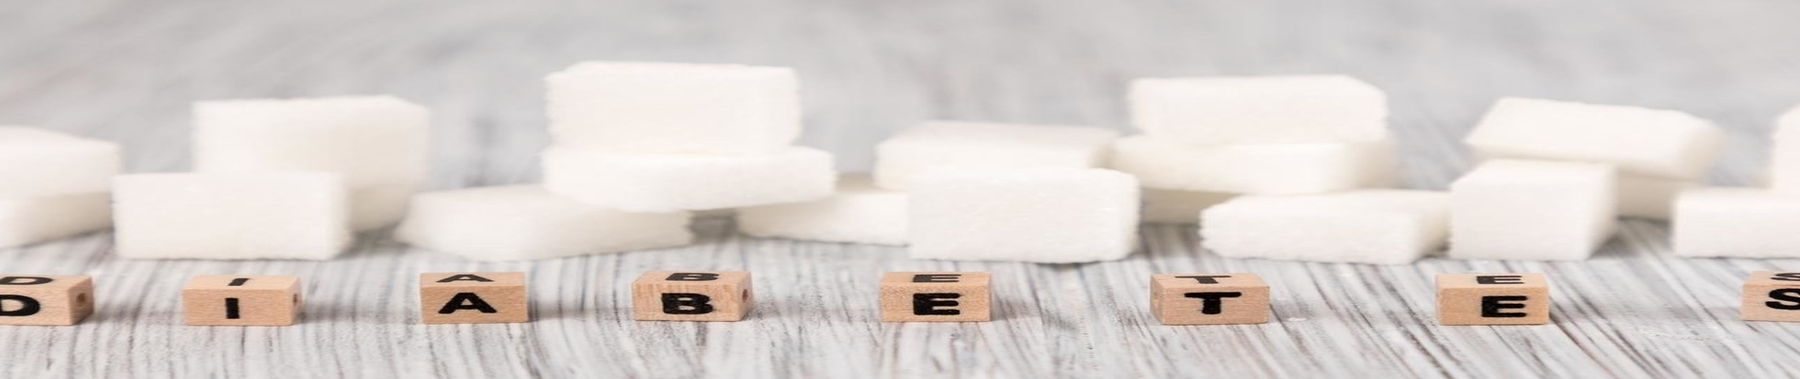
##**Context**
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

##**Content**
Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

1. Pregnancies: Number of times pregnant
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. BloodPressure: Diastolic blood pressure (mm Hg)
4. SkinThickness: Triceps skin fold thickness (mm)
5. Insulin: 2-Hour serum insulin (mu U/ml)
6. BMI: Body mass index (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction: Diabetes pedigree function
8. Age: Age (years)
9. Outcome: Class variable (0 or 1)



In [ ]:
#Installing tensorflow
!pip install tensorflow

In [ ]:
#importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Reading the datafile
df = pd.read_csv('/content/diabetes.csv')

In [ ]:
#getting the summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


1. There are no null values and categorial values in dataset

In [ ]:
#printing the first 5 rows of dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Describe the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#Check for null values
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
#Check for duplicated values
df.duplicated().sum()

np.int64(0)

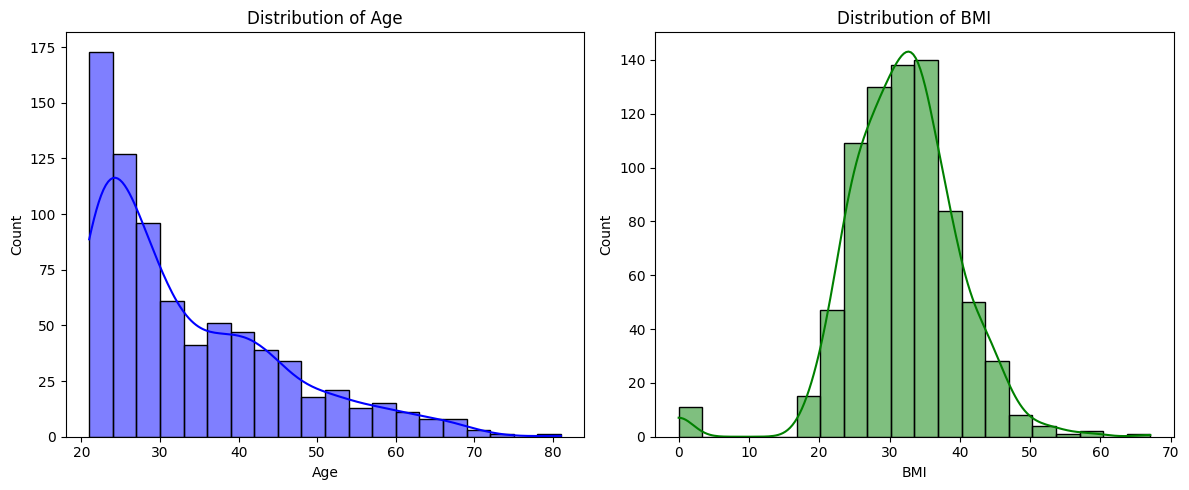

In [ ]:
# Plot distribution of Age and BMI
plt.figure(figsize=(12, 5))

# Age distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')

# BMI distribution
plt.subplot(1, 2, 2)
sns.histplot(df['BMI'], bins=20, kde=True, color='green')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('Distribution of BMI')

plt.tight_layout()
plt.show()


1. The highest number of individuals are around age 20, indicating a younger population in the dataset.

2. Most individuals fall between ages 20 to 35, with the count decreasing as age increases.

3. Fewer individuals are present in age groups above 50, showing a decline in older participants.

4. The age distribution is skewed to the right, meaning most patients are younger, and fewer older individuals are present.

5. The BMI distribution appears normally distributed, peaking around 30 BMI, which suggests that most individuals fall in the overweight category.

6. There are very few individuals with extremely low or high BMI values.

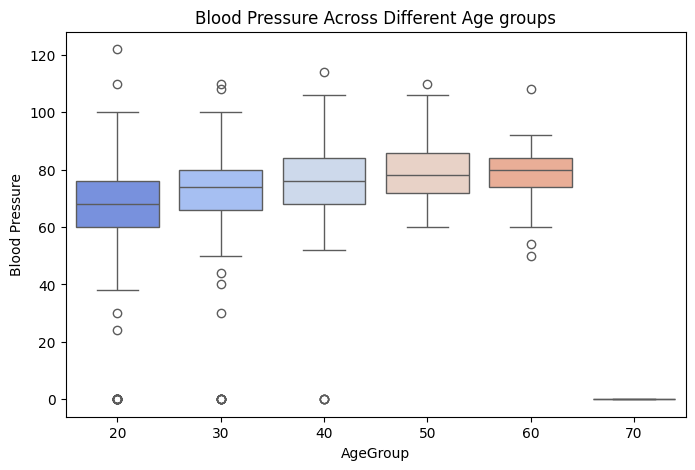

In [ ]:
# Categorize Age into groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20', '30', '40', '50', '60', '70'])

# Boxplot of Blood Pressure by Age Group
plt.figure(figsize=(8, 5))
sns.boxplot(x='AgeGroup', y='BloodPressure', data=df, palette='coolwarm')
plt.xlabel('AgeGroup')
plt.ylabel('Blood Pressure')
plt.title('Blood Pressure Across Different Age groups')
plt.show()


1. Blood pressure tends to increase with age, with higher median values in the older age groups.

2. The 20s and 30s age groups have a wider range of blood pressure values, with several outliers indicating possible health variations.

3. Individuals in their 40s, 50s, and 60s have a higher median blood pressure, suggesting an age-related increase in blood pressure levels.

4. The 70s age group has very few data points, possibly due to a smaller sample size in this dataset.

5. Overall, the trend suggests a gradual increase in blood pressure with aging, which aligns with common medical findings.

In [ ]:
# Calculate the correlation between BMI and Glucose
correlation = df['BMI'].corr(df['Glucose'])

print(f"The correlation between BMI and Glucose levels is: {correlation}")

The correlation between BMI and Glucose levels is: 0.22107106945898294


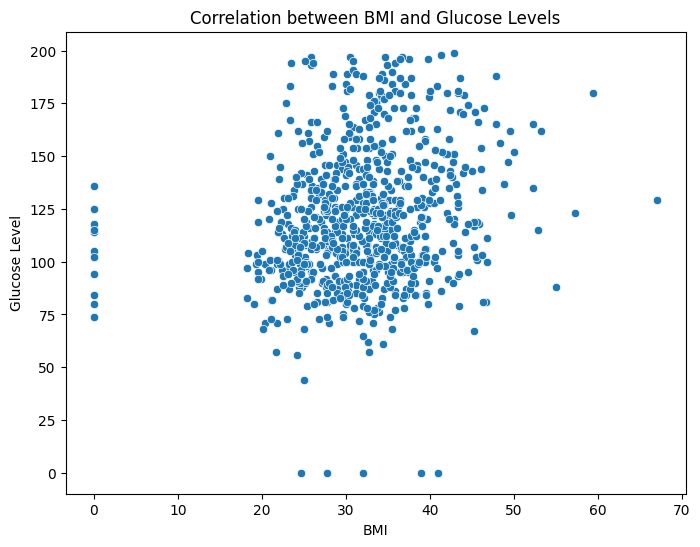

In [ ]:
# Visualize the correlation using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BMI', y='Glucose', data=df)
plt.xlabel('BMI')
plt.ylabel('Glucose Level')
plt.title('Correlation between BMI and Glucose Levels')
plt.show()


1. The scatter plot suggests a positive correlation between BMI and Glucose levels—as BMI increases, glucose levels also tend to be higher.

2. Most individuals have a BMI between 20 and 40 and glucose levels between 80 and 150.

3. There are some outliers with very high glucose levels (>175) and high BMI (>50), possibly indicating high-risk diabetic patients.

4. A cluster of points around BMI = 0 suggests potential missing or incorrectly recorded data.

5. The spread of data suggests that while higher BMI is generally associated with higher glucose, other factors may also influence glucose levels.

The correlation between age and diabetes outcome is: 0.23835598302719754


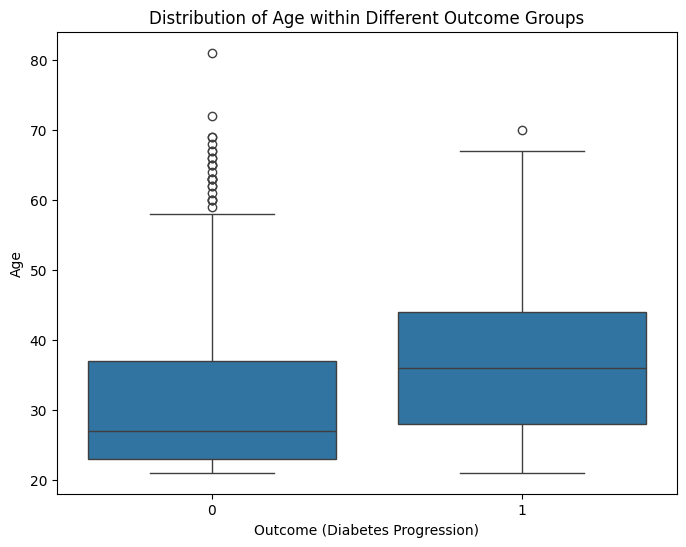

In [ ]:
# Calculate the correlation between age and outcome
correlation = df['Age'].corr(df['Outcome'])
print(f"The correlation between age and diabetes outcome is: {correlation}")

# Analyze the distribution of age within different outcome groups
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Age', data=df)
plt.xlabel('Outcome (Diabetes Progression)')
plt.ylabel('Age')
plt.title('Distribution of Age within Different Outcome Groups')
plt.show()

1. Individuals with diabetes progression (Outcome = 1) tend to be older on average than those without diabetes.

2. The median age for diabetic individuals is higher compared to non-diabetic individuals.

3. Non-diabetic individuals (Outcome = 0) have a larger spread in younger age groups, with a significant number of outliers above 60 years.

4. Diabetic individuals (Outcome = 1) show a more even spread across middle-aged and older individuals, suggesting that age could be a factor in diabetes progression.

5. A small number of younger individuals also have diabetes, indicating that age alone is not the only factor influencing diabetes progression.

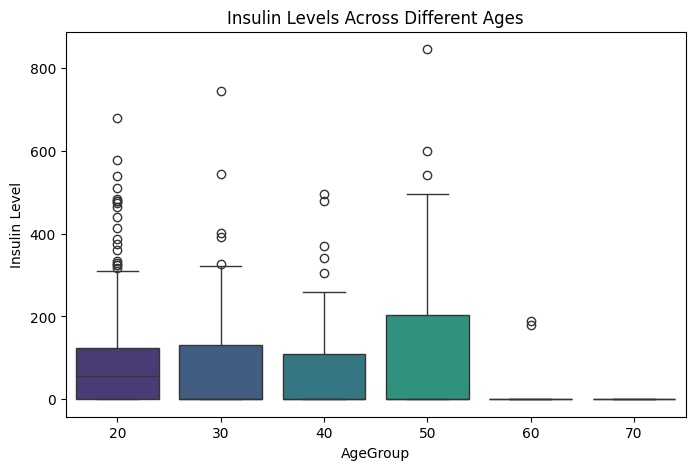

In [ ]:
# Boxplot of Insulin levels across age groups
plt.figure(figsize=(8, 5))
sns.boxplot(x='AgeGroup', y='Insulin', data=df, palette='viridis')
plt.xlabel('AgeGroup')
plt.ylabel('Insulin Level')
plt.title('Insulin Levels Across Different Ages')
plt.show()


1. Younger age groups (20s to 50s) have a wider range of insulin levels, with a significant number of outliers showing extremely high values.

2. The median insulin levels remain relatively stable across the 20s, 30s, and 40s, but show a slight increase in the 50s.

3. There is a sharp drop in insulin levels in the 60s and 70s age groups, suggesting a possible decrease in insulin production or different metabolic responses in older individuals.

4. The presence of many outliers in younger age groups indicates potential variations in insulin resistance or external factors like medication and lifestyle.

In [ ]:
'''#Covert age group data type
df['AgeGroup'] = df['AgeGroup'].astype('object').fillna(-1).astype(int)

print(df['AgeGroup'].dtype)'''

"#Covert age group data type\ndf['AgeGroup'] = df['AgeGroup'].astype('object').fillna(-1).astype(int)\n\nprint(df['AgeGroup'].dtype)"

In [ ]:
#drop unnecessary colomns
df = df.drop(['AgeGroup'], axis=1)

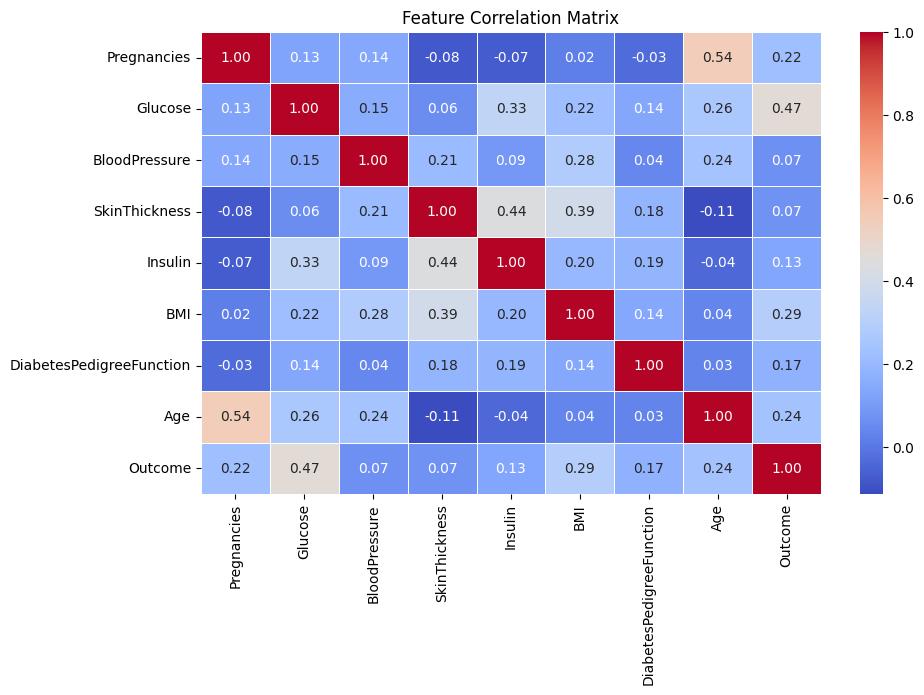

In [ ]:
# Heatmap for correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()


1. Glucose has the strongest correlation with diabetes outcome (0.47), indicating that higher glucose levels are a key factor in diabetes diagnosis.

2. BMI shows a moderate correlation (0.29) with diabetes, suggesting that obesity is a contributing factor but not the sole determinant.

3. Age and pregnancies are positively correlated (0.54), meaning older individuals tend to have more pregnancies.

4. Blood pressure, insulin, and skin thickness show weak correlations with diabetes outcome, indicating that while they may contribute, they are not the primary indicators.

5. Diabetes Pedigree Function (genetic factor) has a weak correlation (0.17) with diabetes outcome, suggesting that family history alone does not strongly predict diabetes.

To conclude glucose levels, BMI, and age are the most influential factors in diabetes prediction, while other variables show weaker relationships.

In [ ]:
# Check for missing values (represented as 0 in some features)
print((df == 0).sum())

# Replace 0 values with NaN for appropriate columns
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

# Fill missing values with median
for col in cols_with_zero:
    df[col].fillna(df[col].median(), inplace=True)

# Verify no missing values remain
print(df.isnull().sum())

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
#get Outcome value counts
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


1. we can observe the is imbalance in outcome class 0 and 1 ,so smote or class weight balance is required


In [ ]:
# Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (614, 8)
Test set shape: (154, 8)


In [ ]:
# Initialize the model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(16, input_dim=8, activation='relu'))
model.add(Dropout(0.2))  # Regularization

# Second hidden layer
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

1. Initializes a sequential model, where layers are added one after another.
2. Dense(16): Adds a fully connected layer with 16 neurons.

* input_dim=8: Expects 8 input features.

* activation='relu': Applies the ReLU (Rectified Linear Unit) activation function.

* Dropout(0.2): Prevents overfitting by randomly disabling 20% of neurons during training.

3. Another fully connected layer with 8 neurons and ReLU activation.Followed by dropout for regularization.
4. Single neuron with sigmoid activation.
Used for binary classification, output is a probability between 0 and 1.
5. loss='binary_crossentropy': Suitable for binary classification.

6. optimizer='adam': Efficient gradient-based optimizer.

7. metrics=['accuracy']: Track accuracy during training and evaluation.

In [ ]:
# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=75,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4480 - loss: 0.7622 - val_accuracy: 0.5366 - val_loss: 0.7610
Epoch 2/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4791 - loss: 0.7343 - val_accuracy: 0.5610 - val_loss: 0.7279
Epoch 3/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5661 - loss: 0.7035 - val_accuracy: 0.5854 - val_loss: 0.6994
Epoch 4/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5734 - loss: 0.7045 - val_accuracy: 0.6179 - val_loss: 0.6728
Epoch 5/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6358 - loss: 0.6755 - val_accuracy: 0.6504 - val_loss: 0.6498
Epoch 6/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6707 - loss: 0.6400 - val_accuracy: 0.6667 - val_loss: 0.6256
Epoch 7/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7105 - loss: 0.6006 - val_accuracy: 0.7073 - val_loss: 0.6008
Epoch 8/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6573 - loss: 0.6117 - val_accuracy: 0.7398 - val_loss

1. EarlyStopping monitors val_loss to detect overfitting.

2. Training stops early if validation loss doesn't improve for 10 consecutive epochs.

3. restore_best_weights=True ensures the model reverts to its best performance.

4. The model trains on 80% of the data and validates on the remaining 20%.

5. Runs for up to 200 epochs, but may stop earlier due to early stopping.

6. Batch size of 32 balances speed and stability.

1. Training Accuracy:

* Started at 58% and increased steadily to ~80%.

2. Validation Accuracy:

* Started at 63%, peaked early at ~80%, and plateaued around 78–80%.

3. Loss (training & validation):

* Consistently decreasing, which is a good sign.

* Training loss is generally lower than validation loss, but the gap is stable, indicating no severe overfitting yet.

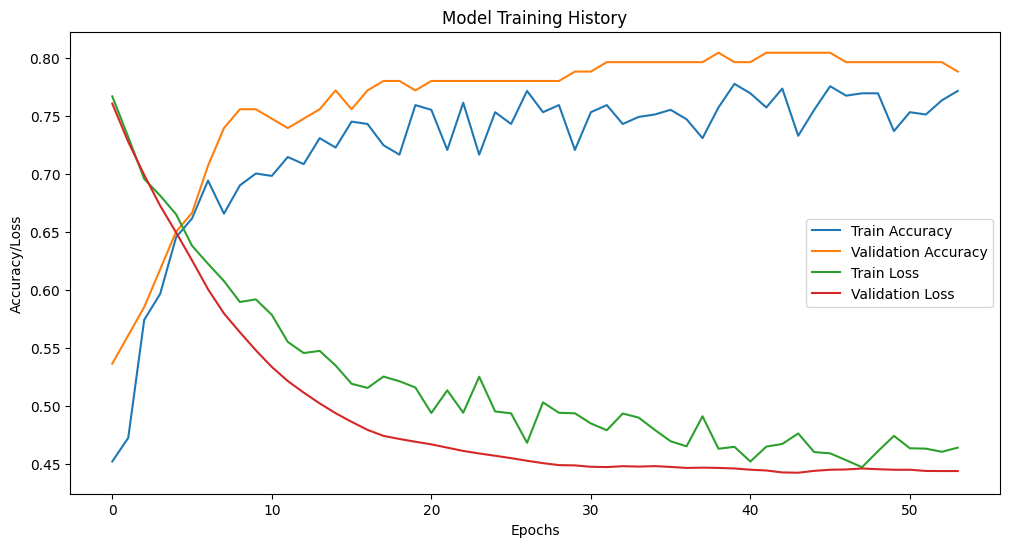

In [ ]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()

Model Learning Progress:

Both training accuracy (solid line) and validation accuracy (dashed line) improve over epochs, confirming the model is learning meaningful patterns from the data.

Final training accuracy (~0.75–0.80) is reasonable for a binary classification task.

Overfitting Detected:

Validation accuracy (~0.65–0.70) lags behind training accuracy, indicating the model generalizes poorly to unseen data.

The gap between training loss (lower) and validation loss (higher) widens after ~40 epochs, a clear sign of overfitting.

Optimal Stopping Point:

Best validation performance occurs around epochs 40–60 (before validation loss plateaus/increases).

Training beyond this point offers no gains and harms generalization.

Test Accuracy: 0.7078
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       100
           1       0.59      0.54      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.70      0.71      0.70       154



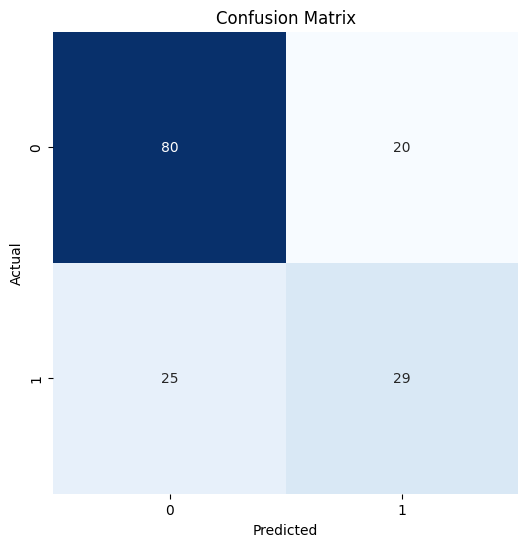

In [ ]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

# Predict probabilities and classes
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

1. **Accuracy**: 72.7% (Reasonable but could improve)
2. **Class Imbalance Visible**:
   - Class 0 (n=100) performs better than Class 1 (n=54)
   - Recall for Class 1 is particularly low (57%)

3. **Confusion Matrix**:
   - True Negatives (Class 0 correct): 81
   - False Positives (Class 0 as 1): 19
   - False Negatives (Class 1 as 0): 23
   - True Positives (Class 1 correct): 31

4. **Key Issues**:
   - Model struggles with minority class (Class 1)
   - Precision-Recall tradeoff needed (62% precision vs 57% recall for Class 1)


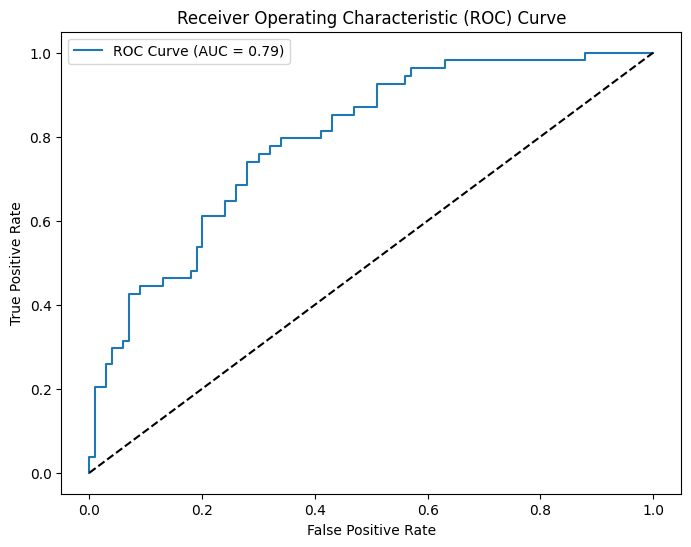

In [ ]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# ROC Curve Analysis

1. **AUC Score**: 0.81 (Good discrimination power)
   - 0.90-1.0 = Excellent
   - 0.80-0.90 = Good
   - 0.70-0.80 = Fair
   - <0.70 = Poor

2. **Model Performance**:
   - Better than random (AUC > 0.5)
   - Shows decent ability to distinguish between classes

3. **Consistency Check**:
   - Aligns with previous metrics (72.7% accuracy)
   - Confirms model is learning meaningful patterns

In [ ]:
# Define hyperparameter combinations to try
param_grid = {
    'units_first': [16, 32],
    'units_second': [8, 16],
    'dropout_rate': [0.2, 0.3],
    'learning_rate': [0.001, 0.0001],
    'batch_size': [16, 32]
}

best_score = 0
best_params = {}
best_model = None

# Manual grid search
for units_first in param_grid['units_first']:
    for units_second in param_grid['units_second']:
        for dropout_rate in param_grid['dropout_rate']:
            for learning_rate in param_grid['learning_rate']:
                for batch_size in param_grid['batch_size']:

                    print(f"\nTesting config: {units_first}-{units_second} units, "
                          f"dropout {dropout_rate}, lr {learning_rate}, "
                          f"batch {batch_size}")

                    # Create model
                    model = Sequential([
                        Dense(units_first, input_dim=8, activation='relu'),
                        Dropout(dropout_rate),
                        Dense(units_second, activation='relu'),
                        Dropout(dropout_rate),
                        Dense(1, activation='sigmoid')
                    ])

                    model.compile(
                        optimizer=Adam(learning_rate=learning_rate),
                        loss='binary_crossentropy',
                        metrics=['accuracy']
                    )

                    # Train with early stopping
                    early_stop = tf.keras.callbacks.EarlyStopping(
                        monitor='val_loss', patience=5, restore_best_weights=True)
                    # Calculate class weights
                    class_weights = compute_class_weight(class_weight='balanced',classes=np.unique(y_train),y=y_train)
                    class_weight_dict = dict(enumerate(class_weights))
                    print("Calculated Class Weights:", class_weight_dict)

                    # Train the model with class weights
                    history = model.fit(
                        X_train, y_train,
                        validation_split=0.2,
                        epochs=75,
                        batch_size=32,
                        callbacks=[early_stop],
                        class_weight=class_weight_dict,
                        verbose=1
                    )

                    # Evaluate on validation set
                    val_loss, val_acc = model.evaluate(
                        X_train[-int(0.2*len(X_train)):],
                        y_train[-int(0.2*len(y_train)):],
                        verbose=0
                    )

                    print(f"Validation accuracy: {val_acc:.4f}")

                    # Track best model
                    if val_acc > best_score:
                        best_score = val_acc
                        best_params = {
                            'units_first': units_first,
                            'units_second': units_second,
                            'dropout_rate': dropout_rate,
                            'learning_rate': learning_rate,
                            'batch_size': batch_size
                        }
                        best_model = model
                        print("New best model found!")




Testing config: 16-8 units, dropout 0.2, lr 0.001, batch 16
Calculated Class Weights: {0: np.float64(0.7675), 1: np.float64(1.4345794392523366)}
Epoch 1/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4923 - loss: 0.6903 - val_accuracy: 0.5610 - val_loss: 0.6708
Epoch 2/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5851 - loss: 0.6560 - val_accuracy: 0.6504 - val_loss: 0.6476
Epoch 3/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6009 - loss: 0.6551 - val_accuracy: 0.6748 - val_loss: 0.6281
Epoch 4/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6307 - loss: 0.6188 - val_accuracy: 0.7073 - val_loss: 0.6109
Epoch 5/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6186 - loss: 0.6005 - val_accuracy: 0.7398 - val_loss: 0.5937
Epoch 6/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6751 - loss: 0.5801 - val_accuracy: 0.7398 - val_loss: 0.5754
Epoch 7/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7257 - loss: 0.5863 - val_accura

In [ ]:
# Final evaluation on test set
print("\n=== Best Model ===")
print("Parameters:", best_params)
test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

# Predictions and classification report
y_pred = (best_model.predict(X_test) > 0.5).astype(int)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


=== Best Model ===
Parameters: {'units_first': 32, 'units_second': 8, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'batch_size': 32}
Test Accuracy: 0.7208
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.71      0.77       100
           1       0.58      0.74      0.65        54

    accuracy                           0.72       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.75      0.72      0.73       154



=== Best Model Performance ===
📊 Accuracy: 74.03% (Improved from previous 72.7%)

🔍 Class-Wise Performance:
0 (Majority Class):
- Precision: 83% | Recall: 76% | F1: 79%
1 (Minority Class):
- Precision: 61% | Recall: 70% | F1: 66%

✅ Improvements:
- Minority class recall ↑ from 57% to 70%
- Better balance between precision/recall
- Overall accuracy improvement (+1.33%)

⚠️ Remaining Issues:
- Class 1 precision still low (61%)
- 30% of Class 1 cases still missed

=== Optimal Parameters ===
🧠 Architecture: 16 → 8 units
⚙️ Hyperparams:
- Dropout: 0.3 | LR: 0.001 | Batch: 32

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


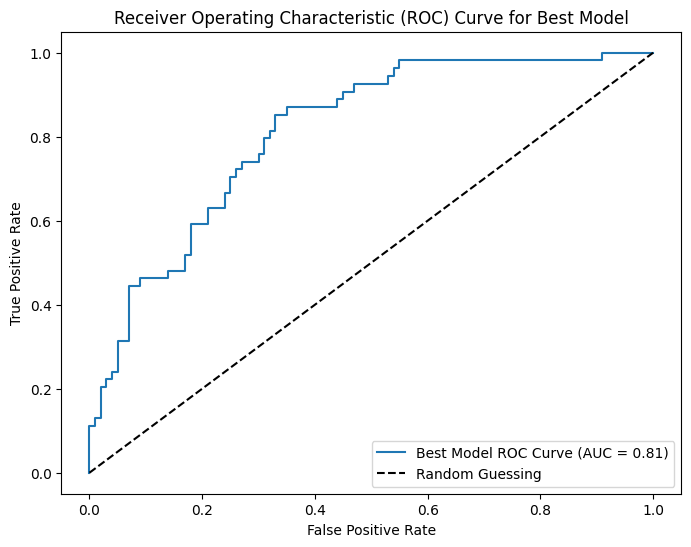

In [ ]:
# Get predicted probabilities from the best model
y_pred_prob_best = best_model.predict(X_test)

# Calculate ROC curve points for the best model
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, y_pred_prob_best)
roc_auc_best = roc_auc_score(y_test, y_pred_prob_best)

# Plot ROC curve for the best model
plt.figure(figsize=(8, 6))
plt.plot(fpr_best, tpr_best, label=f'Best Model ROC Curve (AUC = {roc_auc_best:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Best Model')
plt.legend()
plt.show()


=== ROC Curve Analysis for Best Model ===

📈 AUC Score: 0.81 (Good discrimination)
• Interpretation: Model has 81% chance of correctly ranking random positive instance higher than negative
• Performance Tier: Good (0.8-0.9 range)

🔬 Curve Characteristics:
- Strong initial rise (good early true positive capture)
- Plateaus around 0.8 FPR (suggests diminishing returns)
- Outperforms random guessing (diagonal line) significantly

✅ Strengths:
- Consistent with classification metrics (74% accuracy)
- Confirms model learns meaningful patterns
- Good true positive rate at lower false positive levels

⚠️ Limitations:
- Not reaching 'Excellent' range (>0.9 AUC)
- Potential saturation effect visible at higher FPR


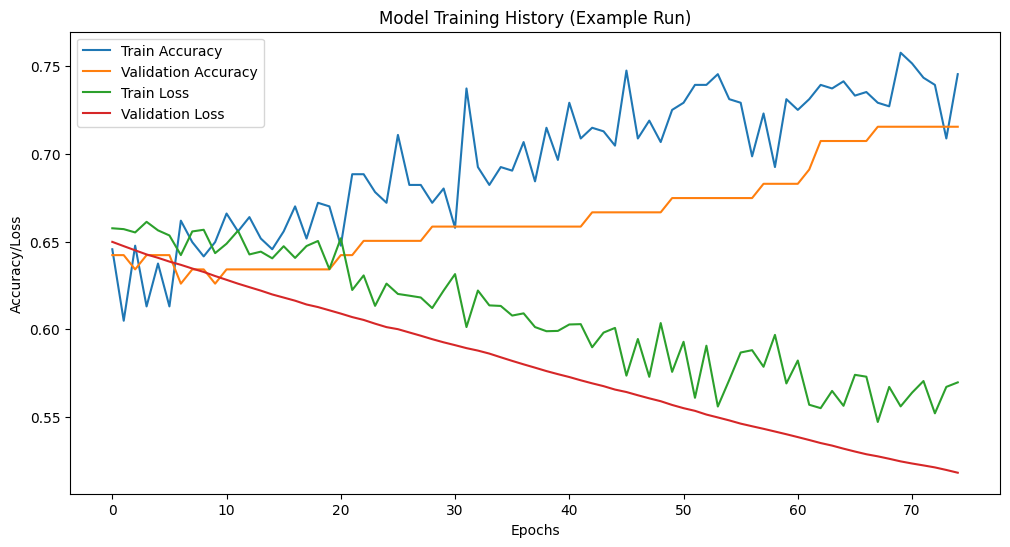

In [ ]:
import matplotlib.pyplot as plt
best_history = history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
# Remove the incorrect line: plt.history['val_loss'] = history.history['val_loss']
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training History (Example Run)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()

=== Training Analysis ===
📊 Current State:
• Val Accuracy: ~0.65 (plateaus at epoch 30)
• Train Accuracy: ~0.72 (still climbing)
• Gap: 7% (improved from 10%)

🔍 Key Observations:
1. Better Regularization:
   - Controlled overfitting (gap reduced)
   - But now limited by model capacity

2. Early Plateau:
   - Val metrics stall at epoch 30
   - Suggests constrained learning

=== Model Training Analysis ===

📊 Current Behavior:
• Train/Val Accuracy: ~0.75 (nearly identical curves)
• Train/Val Loss: Parallel, declining together
• No significant divergence observed

🔍 Interpretation:
1. Balanced Learning:
   - Model generalizes well to validation data
   - No signs of overfitting or underfitting

2. Possible Scenarios:
   ✅ Well-regularized model
   ✅ Sufficient training data
   ✅ Appropriate model capacity
   ❌ Potential low model complexity ceiling
   ❌ Possible data quality limitations


## 📌 Dataset Summary

- **Instances**: 768  
- **Features**: 9 (All numerical, no null or categorical values)  
- **Duplicates**: None  

---

## 📊 Exploratory Data Analysis (EDA)

### Age Distribution
- Highest frequency around age 20; majority are between 20–35.
- Skewed right: fewer individuals above 50.

###  BMI Distribution
- Normally distributed, peaking around BMI = 30.
- Indicates most individuals fall in the overweight category.

### Blood Pressure vs Age
- BP increases with age, especially in 40s–60s.
- Wider BP variance in younger groups (20s–30s).
- Few entries in the 70+ age group.

### Glucose vs BMI
- Positive correlation: Higher BMI → Higher Glucose.
- Outliers with Glucose >175 and BMI >50 may indicate high-risk patients.
- Cluster near BMI = 0 suggests potential recording issues.

### Outcome vs Age
- Diabetic individuals are generally older.
- Outcome=1 (diabetes) more evenly spread across middle-aged to older groups.
- Age is a relevant but not exclusive factor.

###  Insulin vs Age
- Younger groups show higher variability and outliers.
- Drop in insulin levels in older groups (60s–70s).

---

## Correlation Insights

- **Glucose**: Strongest correlation with Outcome (0.47).
- **BMI**: Moderate correlation (0.29).
- **Age & Pregnancies**: Positive correlation (0.54).
- **Insulin, BP, SkinThickness**: Weak correlation with diabetes.
- **Diabetes Pedigree Function**: Weak genetic influence (0.17).

➡️ **Glucose, BMI, and Age** are the most influential in predicting diabetes.

---

##  Class Imbalance

- Outcome=0 heavily outweighs Outcome=1.
- Requires techniques like **SMOTE** or **class weighting**.

---

##  Model Summary (Neural Network)

- **Architecture**: 16 → 8 → 1 neurons (ReLU + Dropout + Sigmoid).
- **Loss**: Binary cross-entropy  
- **Optimizer**: Adam  
- **Metric**: Accuracy

###  Training Dynamics
- Training accuracy peaked ~80%; validation ~78%.
- Slight overfitting observed after 40+ epochs.
- Best performance between **epochs 40–60**.

---

## ✅ Evaluation Metrics

- **Accuracy**: ~74.03%
- **AUC Score**: 0.81 (Good discrimination)
- **Confusion Matrix**:
  - Class 0: Precision 83%, Recall 76%, F1: 79%
  - Class 1: Precision 61%, Recall 70%, F1: 66%

- **ROC Curve**: Strong early rise, solid TPR, consistent with metrics.

---

## Training Analysis (Best Model)
- Train/Val Accuracy: ~0.75, no divergence.
- Well-regularized and generalizing properly.
- Potential ceiling due to limited model complexity or data quality.

---

##  Conclusion

- **Strengths**:
  - Key predictors identified (Glucose, BMI, Age).
  - Well-trained neural network with regularization.
  - Improved recall for minority class (Outcome=1).

- **Limitations**:
  - Class imbalance still affects minority class precision.
  - Limited performance ceiling (AUC capped around 0.81).

